# Tanzanian Water Wells

Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. There are many water points already established in the country, but some are in need of repair while others have failed altogether.

Build a classifier to predict the condition of a water well, using information about the sort of pump, when it was installed, etc. Your audience could be an NGO focused on locating wells needing repair, or the Government of Tanzania looking to find patterns in non-functional wells to influence how new wells are built. Note that this is a ternary classification problem by default, but can be engineered to be binary.

Will  use:
   - logreg
   - knn
   - decision trees
   - svm
   - random forests
   - adaboost
   - xgboost
   - ensemble methods
    

Preliminary Business problem (havent looked at data yet): Identifying wells in need of repair to reduce resource expenditure for updates.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.preprocessing import StandardScaler, OneHotEncoder, \
FunctionTransformer, normalize, PolynomialFeatures, LabelEncoder

from sklearn.linear_model import LinearRegression, LogisticRegression, \
Ridge, Lasso, ElasticNet, LassoCV, RidgeCV, ElasticNetCV

from sklearn.model_selection import train_test_split, cross_validate,\
KFold, cross_val_score, ShuffleSplit, RandomizedSearchCV, GridSearchCV

from sklearn.metrics import mean_squared_error, make_scorer, log_loss, \
confusion_matrix, plot_confusion_matrix, precision_score, recall_score, \
accuracy_score, f1_score, roc_curve, roc_auc_score, classification_report, auc, plot_roc_curve

from sklearn.dummy import DummyRegressor, DummyClassifier

from sklearn.utils import resample

from sklearn.impute import MissingIndicator, SimpleImputer

from sklearn.feature_selection import SelectFromModel

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

from sklearn import tree

from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors

from scipy import stats
from sklearn.naive_bayes import MultinomialNB, GaussianNB

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, \
ExtraTreesClassifier, VotingClassifier, StackingRegressor, StackingClassifier

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

import xgboost

%matplotlib inline


Your goal is to predict the operating condition of a waterpoint for each record in the dataset. You are provided the following set of information about the waterpoints:

- `amount_tsh` - Total static head (amount water available to waterpoint)
- `date_recorded` - The date the row was entered
- `funder` - Who funded the well
- `gps_height` - Altitude of the well
- `installer` - Organization that installed the well
- `longitude` - GPS coordinate
- `latitude` - GPS coordinate
- `wpt_name` - Name of the waterpoint if there is one
- `num_private` -
- `basin` - Geographic water basin
- `subvillage` - Geographic location
- `region` - Geographic location
- `region_code` - Geographic location (coded)
- `district_code` - Geographic location (coded)
- `lga` - Geographic location
- `ward` - Geographic location
- `population` - Population around the well
- `public_meeting` - True/False
- `recorded_by` - Group entering this row of data
- `scheme_management` - Who operates the waterpoint
- `scheme_name` - Who operates the waterpoint
- `permit` - If the waterpoint is permitted
- `construction_year` - Year the waterpoint was constructed
- `extraction_type` - The kind of extraction the waterpoint uses
- `extraction_type_group` - The kind of extraction the waterpoint uses
- `extraction_type_class` - The kind of extraction the waterpoint uses
- `management` - How the waterpoint is managed
- `management_group` - How the waterpoint is managed
- `payment` - What the water costs
- `payment_type` - What the water costs
- `water_quality` - The quality of the water
- `quality_group` - The quality of the water
- `quantity` - The quantity of water
- `quantity_group` - The quantity of water
- `source` - The source of the water
- `source_type` - The source of the water
- `source_class` - The source of the water
- `waterpoint_type` - The kind of waterpoint
- `waterpoint_type_group` - The kind of waterpoint

## Import Data and Baseline model

In [2]:
X_data_df = pd.read_csv('data/x_data.csv')
y_data_df = pd.read_csv('data/target_data.csv')

In [3]:
y_data_df['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

### Need to set the target data as nums using labelEncoder

In [4]:
y_encoded = pd.DataFrame(LabelEncoder().fit_transform(y_data_df['status_group']))

In [5]:
y_encoded.value_counts(normalize=True)

0    0.543081
2    0.384242
1    0.072677
dtype: float64

- 0 = functional
- 1 = functional needs repair
- 2 = non functional

### Lets explore the predictor data

In [6]:
X_data_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [7]:
X_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [8]:
X_data_df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

So many object dtypes. Some ideas: use imputer for most frequent and set an indicator for it.

Potentially drop column for scheme name?

In [9]:
X_data_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


Potentially missing values in amount_tsh, gps_height, long/lat, num_private, district code, pop and def construction year

## Start with lazy approach:
    - merge X and y
        - drop nulls
        - run ohe
        - run model and see how it goes

In [10]:
lazy_df = pd.concat([X_data_df, y_encoded], axis=1)

In [11]:
lazy_df.rename(mapper={0:'target'}, axis=1, inplace=True)

I now have a good starting dataframe for any further analysis. No data has been changed or removed. No tweeking has occured.
There is no data leakage and labelencoder has been applied to the target var

### Now to get real lazy

In [12]:
lazy_df.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0


In [13]:
y_data_df.head(3)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional


In [14]:
lazy_df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [15]:
# dropping scheme_name because theres like no data for it
lazy_df_clean = lazy_df.drop(['scheme_name'], axis=1)

In [16]:
# being lazy and dropping other rows with missing data
lazy_df_clean.dropna(inplace=True)

In [17]:
lazy_df_clean.isna().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
w

In [18]:
lazy_df_clean.shape

(48288, 40)

In [19]:
len(lazy_df_clean)/len(lazy_df)

0.812929292929293

After lazy cleaning, we lost about 19% of data

Now to drop id columns and sep into num and cat cols

In [20]:
lazy_df_clean = lazy_df_clean.drop(['id'], axis=1)

In [21]:
y_lazy = lazy_df_clean.pop('target')

In [22]:
lazy_nums = lazy_df_clean.select_dtypes('number')

In [23]:
lazy_nums

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999
2,25.0,686,37.460664,-3.821329,0,21,4,250,2009
3,0.0,263,38.486161,-11.155298,0,90,63,58,1986
5,20.0,0,39.172796,-4.765587,0,4,8,1,2009
6,0.0,0,33.362410,-3.766365,0,17,3,0,0
...,...,...,...,...,...,...,...,...,...
59394,500.0,351,37.634053,-6.124830,0,5,6,89,2007
59395,10.0,1210,37.169807,-3.253847,0,3,5,125,1999
59396,4700.0,1212,35.249991,-9.070629,0,11,4,56,1996
59398,0.0,0,35.861315,-6.378573,0,1,4,0,0


In [24]:
lazy_cats = lazy_df_clean.select_dtypes('object')

In [25]:
lazy_cats

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,2011-03-14,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,True,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2,2013-02-25,Lottery Club,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,Simanjiro,Ngorika,True,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,2013-01-28,Unicef,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,Nanyumbu,Nanyumbu,True,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
5,2011-03-13,Mkinga Distric Coun,DWE,Tajiri,Pangani,Moa/Mwereme,Tanga,Mkinga,Moa,True,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,2012-10-01,Dwsp,DWSP,Kwa Ngomho,Internal,Ishinabulandi,Shinyanga,Shinyanga Rural,Samuye,True,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59394,2011-03-09,World Bank,ML appro,Chimeredya,Wami / Ruvu,Komstari,Morogoro,Mvomero,Diongoya,True,...,monthly,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
59395,2013-05-03,Germany Republi,CES,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,Hai,Masama Magharibi,True,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,2011-05-07,Cefa-njombe,Cefa,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,Njombe,Ikondo,True,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59398,2011-03-08,Malec,Musa,Mshoro,Rufiji,Mwinyi,Dodoma,Chamwino,Mvumi Makulu,True,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


Ok, I've got lazy nums and cats.
lets train/test nums then:

Lets scale it, run a model and see how it goes. When I come back to this. I gotta try and map by coords and see if that gives me any insight.I think there was a lecture in phase 1 that showed how

NOTE: for cats, lets try and convert date to a date/time type later on but not now

### Note: There is a class imbalance!

In [26]:
y_lazy.value_counts(normalize=True)

0    0.549143
2    0.378417
1    0.072440
Name: target, dtype: float64

Before cats work and after first models, will lump: functional needs repair (1) and non-functional (2).

This will still be inline with my business problem of finding wells that need repairing.

## Setting up train/test split on numeric data and scaling

In [27]:
X_train, X_test, y_train, y_test = train_test_split(lazy_nums, y_lazy, random_state=42)

In [28]:
ss = StandardScaler().fit(X_train)

In [29]:
X_train_scaled = ss.transform(X_train)

In [30]:
X_test_scaled = ss.transform(X_test)

### Setting up a dummy classifier to confirm that my sniff test is about right

In [31]:
dummy = DummyClassifier(strategy='most_frequent', random_state=42)

In [32]:
dummy.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='most_frequent')

In [33]:
dummy.score(X_train_scaled, y_train)

0.548238347691628

In [34]:
dummy.score(X_test_scaled, y_test)

0.5518555334658715

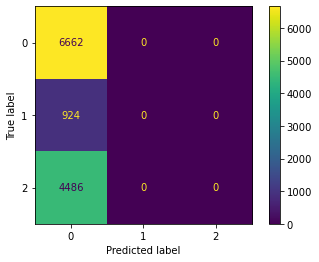

In [35]:
plot_confusion_matrix(dummy, X_test_scaled, y_test);

### Running first models on numerical data

First test = logreg

In [36]:
lr = LogisticRegression(random_state=42)

In [37]:
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [38]:
lr.score(X_train_scaled, y_train)

0.5614093218466976

In [39]:
lr.score(X_test_scaled, y_test)

0.5672630881378397

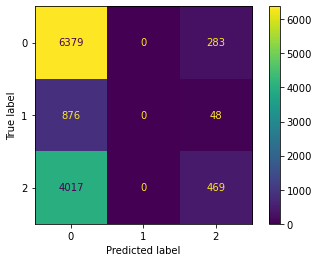

In [40]:
plot_confusion_matrix(lr, X_test_scaled, y_test);

For ease, lets set up a KNN just to see how things look

In [41]:
knn = KNeighborsClassifier()

In [42]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [43]:
knn.score(X_train_scaled, y_train)

0.7642478462557986

In [44]:
knn.score(X_test_scaled, y_test)

0.6751988071570576

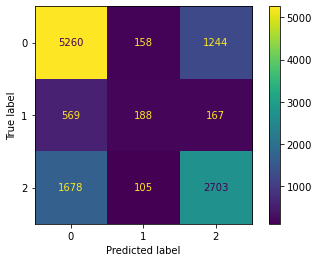

In [45]:
plot_confusion_matrix(knn, X_test_scaled, y_test);

Not horrible, definitely overfitted but its a start and still performs better than the baseline

Lets try a very basic decision tree (Definitely expecting overfitting)

In [46]:
dtc = DecisionTreeClassifier(random_state=42)

In [47]:
dtc.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [48]:
dtc.score(X_train_scaled, y_train)

0.986939474265518

In [49]:
dtc.score(X_test_scaled, y_test)

0.6670808482438702

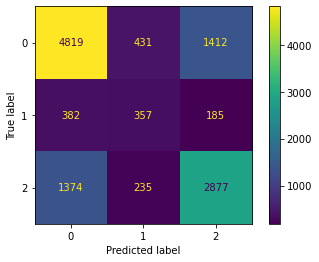

In [50]:
plot_confusion_matrix(dtc, X_test_scaled, y_test);

In [51]:
# Getting feature importance dataframe
dtc_features = pd.DataFrame(lazy_nums.columns, columns=['column_name'])
dtc_features['importance'] = dtc.feature_importances_

In [52]:
dtc_features

,column_name,importance
0,amount_tsh,0.060106
1,gps_height,0.127758
2,longitude,0.310255
3,latitude,0.312115
4,num_private,0.001870
5,region_code,0.017350
6,district_code,0.022328
7,population,0.072723
8,construction_year,0.075495


This one is super duper overfit but thats to be expected.

What if we try a random forest now?

In [53]:
rfc = RandomForestClassifier(random_state=42)

In [54]:
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [55]:
rfc.score(X_train_scaled, y_train)

0.986939474265518

In [56]:
rfc.score(X_test_scaled, y_test)

0.7224983432736912

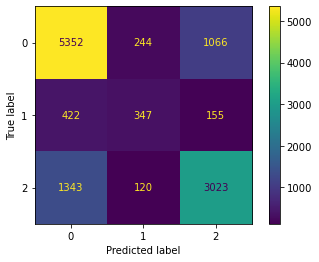

In [57]:
plot_confusion_matrix(rfc, X_test_scaled, y_test);

In [58]:
# Getting feature importance dataframe
rfc_features = pd.DataFrame(lazy_nums.columns, columns=['column_name'])
rfc_features['importance'] = rfc.feature_importances_
rfc_features

,column_name,importance
0,amount_tsh,0.058640
1,gps_height,0.126605
2,longitude,0.289030
3,latitude,0.288249
4,num_private,0.002762
5,region_code,0.029055
6,district_code,0.033942
7,population,0.080485
8,construction_year,0.091231


Still very overfit but I'm getting much better predictions with Random forest than the others. Lets try ensemble?

In [59]:
ada = AdaBoostClassifier(random_state=42)

In [60]:
ada.fit(X_train_scaled, y_train)

AdaBoostClassifier(random_state=42)

In [61]:
ada.score(X_train_scaled, y_train)

0.6293351005080627

In [62]:
ada.score(X_test_scaled, y_test)

0.6209410205434063

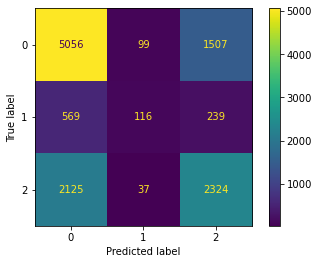

In [63]:
plot_confusion_matrix(ada, X_test_scaled, y_test);

maybe overfit but not really. Looks to perform pretty well, Could do better with some tweeks

#### lets try xgboost classifier

In [64]:
xgb = xgboost.XGBClassifier(random_state=42)

In [65]:
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
xgb.score(X_train_scaled, y_train)

0.7780262867240998

In [67]:
xgb.score(X_test_scaled, y_test)

0.7040258449304175

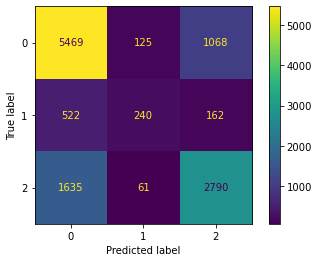

In [68]:
plot_confusion_matrix(xgb, X_test_scaled, y_test);

Not bad. Lets try xgb random forest

In [69]:
xgbrf = xgboost.XGBRFClassifier(random_state=42)

In [70]:
xgbrf.fit(X_train_scaled, y_train)

XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=0, num_parallel_tree=100,
                objective='multi:softprob', random_state=42, reg_alpha=0,
                scale_pos_weight=None, tree_method='exact',
                validate_parameters=1, verbosity=None)

In [71]:
xgbrf.score(X_train_scaled,y_train)

0.6578584051248068

In [72]:
xgbrf.score(X_test_scaled, y_test)

0.6435553346587144

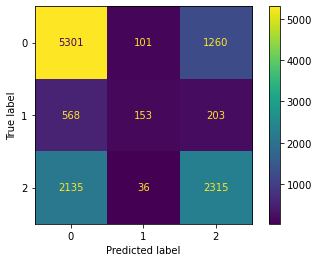

In [73]:
plot_confusion_matrix(xgbrf, X_test_scaled, y_test);

Stacking regressor?

In [74]:
estimators = [
    ('lr', LogisticRegression(random_state=42)), 
    ('knn', KNeighborsClassifier()),
    ('dtc', DecisionTreeClassifier(random_state=42))
]

In [75]:
stack = StackingClassifier(estimators)

In [76]:
stack.fit(X_train_scaled,y_train)

StackingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('dtc',
                                DecisionTreeClassifier(random_state=42))])

In [77]:
stack.score(X_train_scaled, y_train)

0.8850784183786172

In [78]:
stack.score(X_test_scaled,y_test)

0.6998011928429424

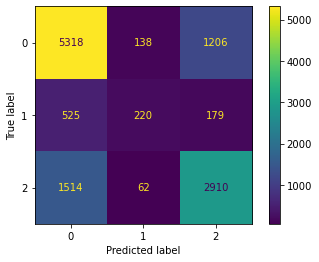

In [79]:
plot_confusion_matrix(stack, X_test_scaled, y_test);

Its overfit but gives me hope. I think since dt and knn are overfit that kinda gives it away as to why.

**Another idea to try is reducing max depth in decision tree and adjusting knn also**

Gonna try one last stack with models that are less overfit.

Setting obective for xgb based on https://stackoverflow.com/questions/57986259/multiclass-classification-with-xgboost-classifier

Looks like default is for binary?

In [80]:
estimators2 = [
    ('lr', LogisticRegression(random_state=42, max_iter=1000)), 
    ('knn', KNeighborsClassifier()),
    ('dtc', DecisionTreeClassifier(random_state=42)),
    ('rfc', RandomForestClassifier(random_state=42)),
    ('ada', AdaBoostClassifier(random_state=42)),
    ('xgb', xgboost.XGBClassifier(random_state=42, objective='multi:softmax')),
    ('xgbrf', xgboost.XGBRFClassifier(random_state=42))
]

In [81]:
stack2 = StackingClassifier(estimators2)

In [82]:
stack2.fit(X_train_scaled,y_train)

C:\Users\nacnu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(estimators=[('lr',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('dtc', DecisionTreeClassifier(random_state=42)),
                               ('rfc', RandomForestClassifier(random_state=42)),
                               ('ada', AdaBoostClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=N...
                                                gamma=None, gpu_id=None,
                                                importance_type='gain',
                                                interaction_constraints=None,
                                              

In [83]:
stack2.score(X_train_scaled, y_train)

0.9211950519107577

In [84]:
stack2.score(X_test_scaled,y_test)

0.7301192842942346

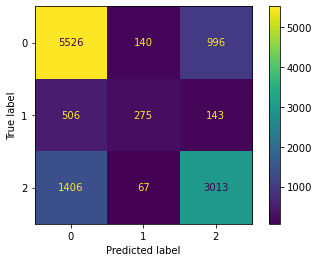

In [85]:
plot_confusion_matrix(stack2, X_test_scaled, y_test);

NOW I NEED TO LOOK AT ALL SCORES DATA AND SEE HOW IT ACTUALLY COMPARES WHEN LOOKING AT MORE THAN JUST ACCURACY

Also need to add in cat data and ohe it, then concat and run again

# Note to self: dont delete stuff until the very end. Keep an itterative approach regardless of things getting a little wild so I can keep tabs on performance for it all. THIS IS V IMPORTANT

Need to get feature importance for each model too

## Working on cat data now. Going to OHE and set up train/test split.

In [86]:
lazy_cats

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,2011-03-14,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,True,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2,2013-02-25,Lottery Club,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,Simanjiro,Ngorika,True,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,2013-01-28,Unicef,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,Nanyumbu,Nanyumbu,True,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
5,2011-03-13,Mkinga Distric Coun,DWE,Tajiri,Pangani,Moa/Mwereme,Tanga,Mkinga,Moa,True,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,2012-10-01,Dwsp,DWSP,Kwa Ngomho,Internal,Ishinabulandi,Shinyanga,Shinyanga Rural,Samuye,True,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59394,2011-03-09,World Bank,ML appro,Chimeredya,Wami / Ruvu,Komstari,Morogoro,Mvomero,Diongoya,True,...,monthly,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
59395,2013-05-03,Germany Republi,CES,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,Hai,Masama Magharibi,True,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,2011-05-07,Cefa-njombe,Cefa,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,Njombe,Ikondo,True,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59398,2011-03-08,Malec,Musa,Mshoro,Rufiji,Mwinyi,Dodoma,Chamwino,Mvumi Makulu,True,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


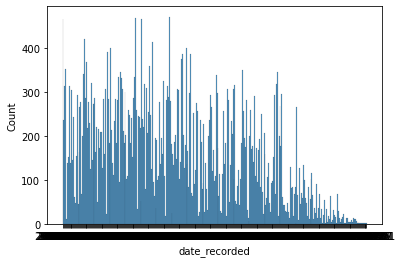

In [87]:
sns.histplot(lazy_cats['date_recorded']);

In [88]:
y_lazy
lazy_cats

X_train_cats, X_test_cats, y_train_cats, y_test_cats = train_test_split(lazy_cats, y_lazy, random_state=42)

In [89]:
cols = X_train_cats.columns
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [90]:
X_train_cats_ohe = pd.DataFrame(ohe.fit_transform(X_train_cats), columns= ohe.fit(X_train_cats).get_feature_names(cols))
X_test_cats_ohe = pd.DataFrame(ohe.transform(X_test_cats), columns= ohe.fit(X_train_cats).get_feature_names(cols))

In [91]:
X_train_cats_ohe

,date_recorded_2002-10-14,date_recorded_2004-01-07,date_recorded_2004-03-01,date_recorded_2004-04-01,date_recorded_2004-04-05,date_recorded_2004-05-01,date_recorded_2004-12-01,date_recorded_2011-01-03,date_recorded_2011-01-04,date_recorded_2011-01-08,...,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
36212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
36213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
36214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Setting up dummy test

In [92]:
dummmy_cats = DummyClassifier(strategy='most_frequent', random_state=42)

In [93]:
dummmy_cats.fit(X_train_cats_ohe, y_train_cats)

DummyClassifier(random_state=42, strategy='most_frequent')

In [94]:
dummmy_cats.score(X_train_cats_ohe, y_train_cats)

0.548238347691628

### Setting up logreg

In [95]:
lr_cats = LogisticRegression(random_state=42).fit(X_train_cats_ohe, y_train_cats)

C:\Users\nacnu\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [96]:
lr_cats.score(X_train_cats_ohe, y_train_cats)

0.8716313231720786

In [97]:
lr_cats.score(X_test_cats_ohe, y_test_cats)

0.7845427435387674

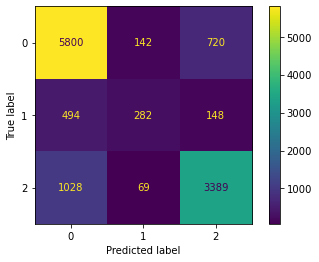

In [98]:
plot_confusion_matrix(lr_cats, X_test_cats_ohe, y_test_cats);

**logreg on cat data did surprisingly well**

### Setting up KNN on cat data

In [ ]:
warning

In [ ]:
warning

In [ ]:
warning

In [ ]:
warning

In [99]:
knn_cats = KNeighborsClassifier().fit(X_train_cats_ohe, y_train_cats)

In [100]:
knn_cats.score(X_train_cats_ohe, y_train_cats)

0.8435774243428319

In [101]:
knn_cats.score(X_test_cats_ohe, y_test_cats)

0.7866136514247847

This takes absolutely forever. I need to drop some columns that arent relevant.

### Setting up Decision Trees

In [99]:
dtc_cats = DecisionTreeClassifier(random_state=42).fit(X_train_cats_ohe, y_train_cats)

In [100]:
dtc_cats.score(X_train_cats_ohe, y_train_cats)

0.9953887784404682

In [101]:
dtc_cats.score(X_test_cats_ohe, y_test_cats)

0.7824718356527501

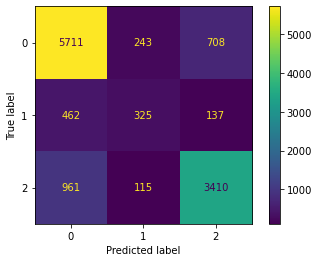

In [102]:
plot_confusion_matrix(dtc_cats, X_test_cats_ohe, y_test_cats);

### Setting up Random Forest

In [103]:
rf_cats = RandomForestClassifier(random_state=42).fit(X_train_cats_ohe, y_train_cats)

In [104]:
rf_cats.score(X_train_cats_ohe, y_train_cats)

0.9953335542301746

In [105]:
rf_cats.score(X_test_cats_ohe, y_test_cats)

0.8057488402915838

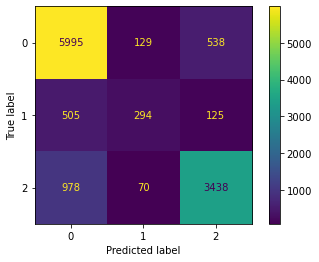

In [106]:
plot_confusion_matrix(rf_cats, X_test_cats_ohe, y_test_cats);

### AdaBoost Cats

In [ ]:
ada_cats = AdaBoostClassifier(random_state=42).fit(X_train_cats_ohe, y_train_cats)

In [ ]:
ada_cats.score(X_train_cats_ohe, y_train_cats)

In [ ]:
ada_cats.score(X_test_cats_ohe, y_test_cats)

In [ ]:
plot_confusion_matrix(ada_cats, X_test_cats_ohe, y_test_cats);

# Next Steps and reviewing my past strategy

**Numbers**
- `amount_tsh` - Total static head (amount water available to waterpoint)
- `gps_height` - Altitude of the well
- `longitude` - GPS coordinate
- `latitude` - GPS coordinate
- `num_private` -
- `population` - Population around the well
- `construction_year` - Year the waterpoint was constructed

**Categories**
- `installer` - Organization that installed the well
- `wpt_name` - Name of the waterpoint if there is one
- `basin` - Geographic water basin
- `subvillage` - Geographic location
- `lga` - Geographic location
- `ward` - Geographic location
- `public_meeting` - True/False
- `scheme_management` - Who operates the waterpoint
- `permit` - If the waterpoint is permitted
- `extraction_type` - The kind of extraction the waterpoint uses
- `extraction_type_group` - The kind of extraction the waterpoint uses
- `extraction_type_class` - The kind of extraction the waterpoint uses
- `management` - How the waterpoint is managed
- `management_group` - How the waterpoint is managed
- `payment` - What the water costs
- `payment_type` - What the water costs
- `water_quality` - The quality of the water
- `quality_group` - The quality of the water
- `quantity` - The quantity of water
- `quantity_group` - The quantity of water
- `source` - The source of the water
- `source_type` - The source of the water
- `source_class` - The source of the water
- `waterpoint_type` - The kind of waterpoint
- `waterpoint_type_group` - The kind of waterpoint
- `region_code` - Geographic location (coded)
- `district_code` - Geographic location (coded)

**Dropped/ To Drop**
- `scheme_name` - Who operates the waterpoint 
    - dropped because its missing a ton of data. Might just be that no one operates this particular well
    - maybe set up a true/false for operated/not operated?
- `date_recorded` - The date the row was entered
    - this is just data for when the info was recorded. Shouldnt have much of an effect on well performance
- `funder` - Who funded the well
    - who paid for the well shouldnt matter as much as the other cats
- `region` - Geographic location
    - this is the cat col for region, it is already codified in numeric
    - should bring it from numeric back to cat though, change it to an object type
- `recorded_by` - Group entering this row of data
    - group whos taking notes shouldnt affect the data itself
    
    
**Notes**
- need to take a look at region code and district code, see which they match up with and drop the corresponding cat col.
- need to either SMOTE the functional needs repair or just move it in with the non-functional
- Take a look at `funder`, `installer`, `subvillage`, `public_meeting`, `scheme_management`, and `permit` to determine what to do with nuls
    - Some ideas: use imputer for most frequent and set a 'missing' indicator for it.
- need to run classification table to see how all results come out instead of just accuracy
- need to set up gridsearch to find best hyper parameters
- VERY IMPORTANT: need to see how many values are in each cat column so I can try and reduce/lump/see what's important/check for typos that are making this mess bigger
- use chatgpt to get a better idea of what SVC is and then put that in here too
- https://medium.com/@michael.gunawan2002/build-a-penguin-classifier-using-machine-learning-pipeline-55c3ef74f15a has info on pipelines

In [107]:
lazy_df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

### Dropping the columns listed above

In [108]:
cols_to_drop = ['scheme_name', 'id', 'date_recorded', 'region', 'funder', 'recorded_by']
better_df = lazy_df.drop(cols_to_drop, axis=1)

In [109]:
better_df.head()

,amount_tsh,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region_code,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target
0,6000.0,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,11,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
1,0.0,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,20,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0
2,25.0,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,21,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0
3,0.0,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,90,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,2
4,0.0,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,18,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0


### Taking a look at nulls and how I should clean/organize them

In [110]:
better_df.isna().sum()

amount_tsh                  0
gps_height                  0
installer                3655
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                371
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting           3334
scheme_management        3877
permit                   3056
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
quantity_group              0
source                      0
source_type                 0
source_class                0
waterpoint_type             0
waterpoint

In [120]:
better_df.nunique()

amount_tsh                  98
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
scheme_management           12
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoi

In [122]:
lazy_nums.head()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999
2,25.0,686,37.460664,-3.821329,0,21,4,250,2009
3,0.0,263,38.486161,-11.155298,0,90,63,58,1986
5,20.0,0,39.172796,-4.765587,0,4,8,1,2009
6,0.0,0,33.362410,-3.766365,0,17,3,0,0


In [123]:
better_df['installer'].value_counts()

DWE                 17402
Government           1825
RWE                  1206
Commu                1060
DANIDA               1050
                    ...  
Mgaya                   1
local technitian        1
Mketo                   1
FINI Water              1
Deus Ndege              1
Name: installer, Length: 2145, dtype: int64

### There are 2145 unique installers and we are missing 3655 points. DWE has the vast majority with 17402 wells so I will use imputer to fill the nulls with the most frequent

In [125]:
better_df['subvillage'].value_counts()

Madukani           508
Shuleni            506
Majengo            502
Kati               373
Mtakuja            262
                  ... 
Bung'Ang'A           1
Nyabusula No. 7      1
Busebi               1
Ulasa                1
Nachimwene           1
Name: subvillage, Length: 19287, dtype: int64

### We are only missing 371 subvillages and there are 19287 different subvillages currently. I will just drop this small amount of data

In [126]:
better_drops = better_df.dropna(subset=['subvillage'])

In [129]:
better_drops.shape

(59029, 35)

59029 data points left, started with 59400. Not much data loss here.

In [130]:
better_drops.isna().sum()

amount_tsh                  0
gps_height                  0
installer                3655
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                  0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting           3333
scheme_management        3869
permit                   3056
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
quantity_group              0
source                      0
source_type                 0
source_class                0
waterpoint_type             0
waterpoint

In [131]:
better_drops['public_meeting'].value_counts()

True     50642
False     5054
Name: public_meeting, dtype: int64

#### Public meeting is just true/false, only 3333 missing from dataset and 50k+ points are true. Will use imputer to code missing as True

### Scheme_management is missing 3869, there are 12 possible categories. 36k+ are VWG, will use imputer to fill missing with VWC

In [132]:
better_drops['scheme_management'].value_counts()

VWC                 36437
WUG                  5206
Water authority      3147
WUA                  2883
Water Board          2747
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

### Permit is missing 3056, there are 2 possible categories (true/false) true has 38793 while false is 17180. Will use imputer to fill all missing with True

In [133]:
better_drops['permit'].value_counts()

True     38793
False    17180
Name: permit, dtype: int64

## Now to actually impute

In [171]:
bet_cols = list(better_drops.columns)

In [145]:
imp = SimpleImputer(strategy='most_frequent', add_indicator=True)

In [150]:
df_clean_impute = imp.fit_transform(better_drops)

In [173]:
indicator_list = ['installer_indicator', 'public_meeting_indicator', 'scheme_management_indicator', 'permit_indicator']

for x in indicator_list:
    bet_cols.append(x)

In [174]:
bet_cols

['amount_tsh',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'basin',
 'subvillage',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'scheme_management',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'target',
 'installer_indicator',
 'public_meeting_indicator',
 'scheme_management_indicator',
 'permit_indicator']

In [175]:
df_clean_impute = pd.DataFrame(df_clean_impute, columns=bet_cols)

In [176]:
df_clean_impute

,amount_tsh,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region_code,...,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target,installer_indicator,public_meeting_indicator,scheme_management_indicator,permit_indicator
0,6000,1390,Roman,34.9381,-9.85632,none,0,Lake Nyasa,Mnyusi B,11,...,spring,spring,groundwater,communal standpipe,communal standpipe,0,False,False,False,False
1,0,1399,GRUMETI,34.6988,-2.14747,Zahanati,0,Lake Victoria,Nyamara,20,...,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0,False,True,False,False
2,25,686,World vision,37.4607,-3.82133,Kwa Mahundi,0,Pangani,Majengo,21,...,dam,dam,surface,communal standpipe multiple,communal standpipe,0,False,False,False,False
3,0,263,UNICEF,38.4862,-11.1553,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,90,...,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,2,False,False,False,False
4,0,0,Artisan,31.1308,-1.82536,Shuleni,0,Lake Victoria,Kyanyamisa,18,...,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59024,10,1210,CES,37.1698,-3.25385,Area Three Namba 27,0,Pangani,Kiduruni,3,...,spring,spring,groundwater,communal standpipe,communal standpipe,0,False,False,False,False
59025,4700,1212,Cefa,35.25,-9.07063,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,11,...,river,river/lake,surface,communal standpipe,communal standpipe,0,False,False,False,False
59026,0,0,DWE,34.0171,-8.75043,Mashine,0,Rufiji,Madungulu,12,...,machine dbh,borehole,groundwater,hand pump,hand pump,0,True,False,False,False
59027,0,0,Musa,35.8613,-6.37857,Mshoro,0,Rufiji,Mwinyi,1,...,shallow well,shallow well,groundwater,hand pump,hand pump,0,False,False,False,False


In [177]:
df_clean_impute.isna().sum()

amount_tsh                     0
gps_height                     0
installer                      0
longitude                      0
latitude                       0
wpt_name                       0
num_private                    0
basin                          0
subvillage                     0
region_code                    0
district_code                  0
lga                            0
ward                           0
population                     0
public_meeting                 0
scheme_management              0
permit                         0
construction_year              0
extraction_type                0
extraction_type_group          0
extraction_type_class          0
management                     0
management_group               0
payment                        0
payment_type                   0
water_quality                  0
quality_group                  0
quantity                       0
quantity_group                 0
source                         0
source_typ

I now have a clean dataframe. Several columns have been dropped. Things have been imputted and missing indicators are set. I have label encoded the target variable. Next I need to resplit the X and y_vars. Then set up train/test/split. OHE the cats and num cols. Set up a pipeline and run more tests.